# Data Integrity check

In [18]:
from Wrangling import DataStorage , FeaturesGenerator
import utils
import polars as pl
import Pyspector
from Costumer_segment import CustomerSegmentation , SegmentationViz
import EDA
from EDA import Analytics, Exploratory_analysis 
from datetime import datetime
from sklearn.model_selection import train_test_split


File structure:
├── client.csv (Memory Usage: 1.3047428131103516 MB, Columns: 7)
├── county_id_to_name_map.json (Memory Usage: 0.000316619873046875 MB, Columns: 0)
├── data_inspection_report.pdf (Memory Usage: N/A MB, Columns: N/A)
├── electricity_prices.csv (Memory Usage: 0.7337074279785156 MB, Columns: 4)
├── enefit/
  ├── competition.cpython-310-x86_64-linux-gnu.so (Memory Usage: N/A MB, Columns: N/A)
  ├── __init__.py (Memory Usage: N/A MB, Columns: N/A)
├── example_test_files/
  ├── client.csv (Memory Usage: 0.008519172668457031 MB, Columns: 7)
  ├── electricity_prices.csv (Memory Usage: 0.004599571228027344 MB, Columns: 4)
  ├── forecast_weather.csv (Memory Usage: 4.484320640563965 MB, Columns: 18)
  ├── gas_prices.csv (Memory Usage: 0.00021839141845703125 MB, Columns: 5)
  ├── historical_weather.csv (Memory Usage: 1.0864601135253906 MB, Columns: 18)
  ├── revealed_targets.csv (Memory Usage: 0.6030216217041016 MB, Columns: 9)
  ├── sample_submission.csv (Memory Usage: 0.16665267

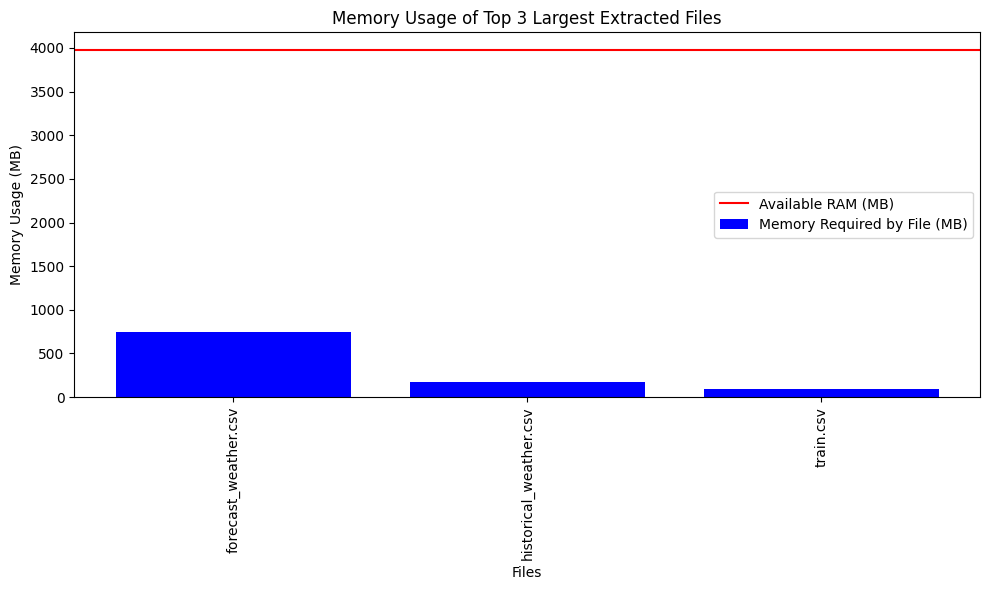

In [19]:
# Example of using the class
zip_extractor = Pyspector.ZipExtractor()
zip_path = r'C:\Users\ALBER\OneDrive\Desktop\Reply Projects\data.zip'  # Replace with your ZIP file path
password = 'your_password'  # Replace with the actual password if the ZIP file is encrypted, or set to None
batch_needed = zip_extractor.extract_zip_file(zip_path, password)

In [21]:
pyspector = Pyspector.Inspector(r'C:\Users\ALBER\OneDrive\Desktop\Reply Projects\data', "Enefit Dataset Inspection", "Consumers Prosumer Analysis", "Generated on: " + datetime.now().strftime('%Y-%m-%d') + 
                                " This report provides a detailed analysis of the datasets in order to evaluate data quality and identify potential issues.")
pyspector.generate_report()

Data inspection report has been saved as 'C:\Users\ALBER\OneDrive\Desktop\Reply Projects\data\data_inspection_report.pdf'.


### Insight: Which tool is more suitable for data loading?

                               File Name  File Size (bytes)  Pandas Time (s)  \
0                             client.csv            1368122         0.039252   
1             county_id_to_name_map.json                301         0.015669   
2                 electricity_prices.csv             769348         0.031260   
3                   forecast_weather.csv          781119880         7.536074   
4                         gas_prices.csv              23898         0.002672   
5                 historical_weather.csv          180530222         2.206964   
6                              train.csv           98978994         1.034319   
7  weather_station_to_county_mapping.csv               2831         0.001000   

   Polars Time (s)  
0         0.100979  
1         0.001487  
2         0.000000  
3         0.559730  
4         0.001603  
5         0.188338  
6         0.101293  
7         0.001606  


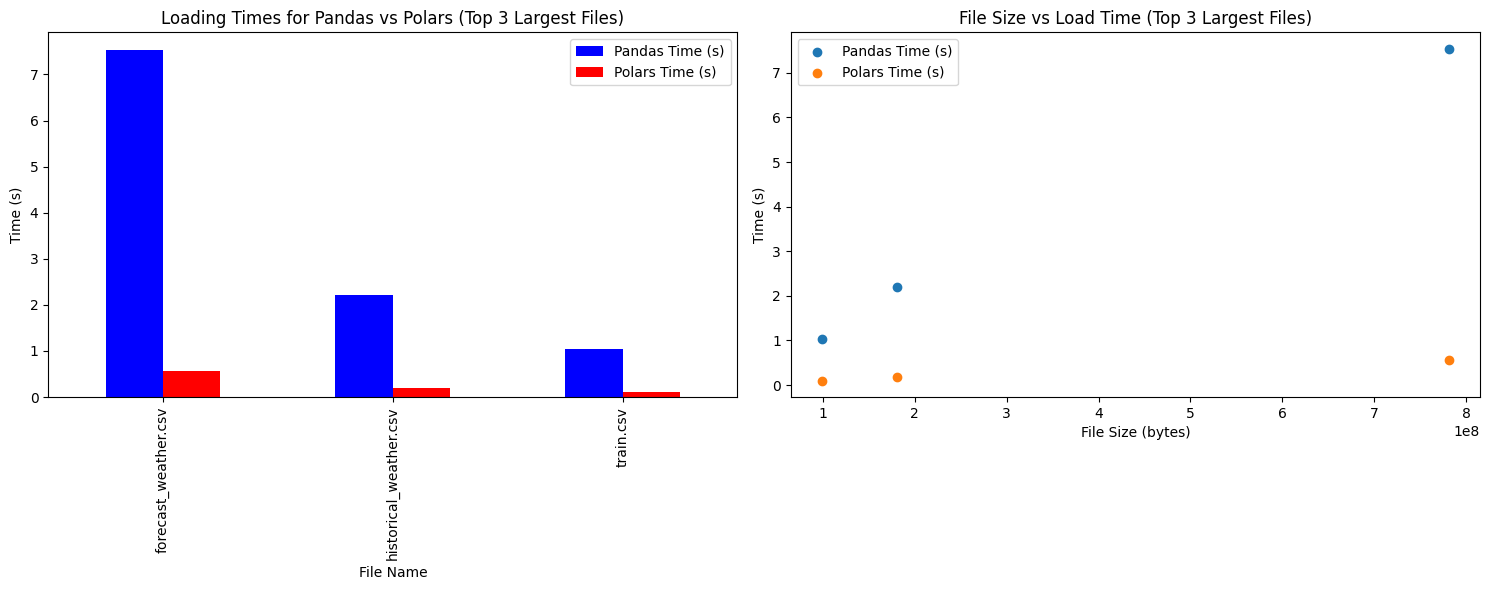

In [4]:
directory = r'C:\Users\ALBER\OneDrive\Desktop\Reply Projects\data'  # Replace with your actual directory
loader = utils.DataLoader(directory)
results_df = loader.benchmark_files()
print(results_df)
loader.plot_results(results_df)

# Loading Data in workspace

straight forward methods

In [94]:
%%time
data_storage = DataStorage()
features_generator = FeaturesGenerator(data_storage=data_storage)

df_train_features = features_generator.generate_features(data_storage.df_data)
df_train_features = df_train_features[df_train_features['target'].notnull()]
df_train_features = utils.clean_data(df_train_features , column_threshold=0.6)
# df_train_features.isnull().sum().sum()
df_train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1567654 entries, 409728 to 2018351
Columns: 152 entries, county to target
dtypes: bool(1), category(5), float32(140), float64(2), int32(1), int8(3)
memory usage: 894.0 MB
CPU times: total: 44.4 s
Wall time: 26.1 s


## Automatic EDA

In [ ]:
pip install ydata-profiling

In [37]:
import pandas as pd

client_df = pd.DataFrame(data_storage.df_client, columns=data_storage.df_client.columns)
train_df = pd.DataFrame(data_storage.df_data, columns=data_storage.df_data.columns)
electricity_df = pd.DataFrame(data_storage.df_electricity_prices, columns=data_storage.df_electricity_prices.columns)
for_weather_df = pd.DataFrame(data_storage.df_forecast_weather, columns=data_storage.df_forecast_weather.columns)
hist_weather_df = pd.DataFrame(data_storage.df_historical_weather, columns=data_storage.df_historical_weather.columns)



In [22]:
from ydata_profiling import ProfileReport

profile = ProfileReport(client_df, tsmode=True, sortby="date", title="Time-Series EDA")

profile.to_file("report_timeseries.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA

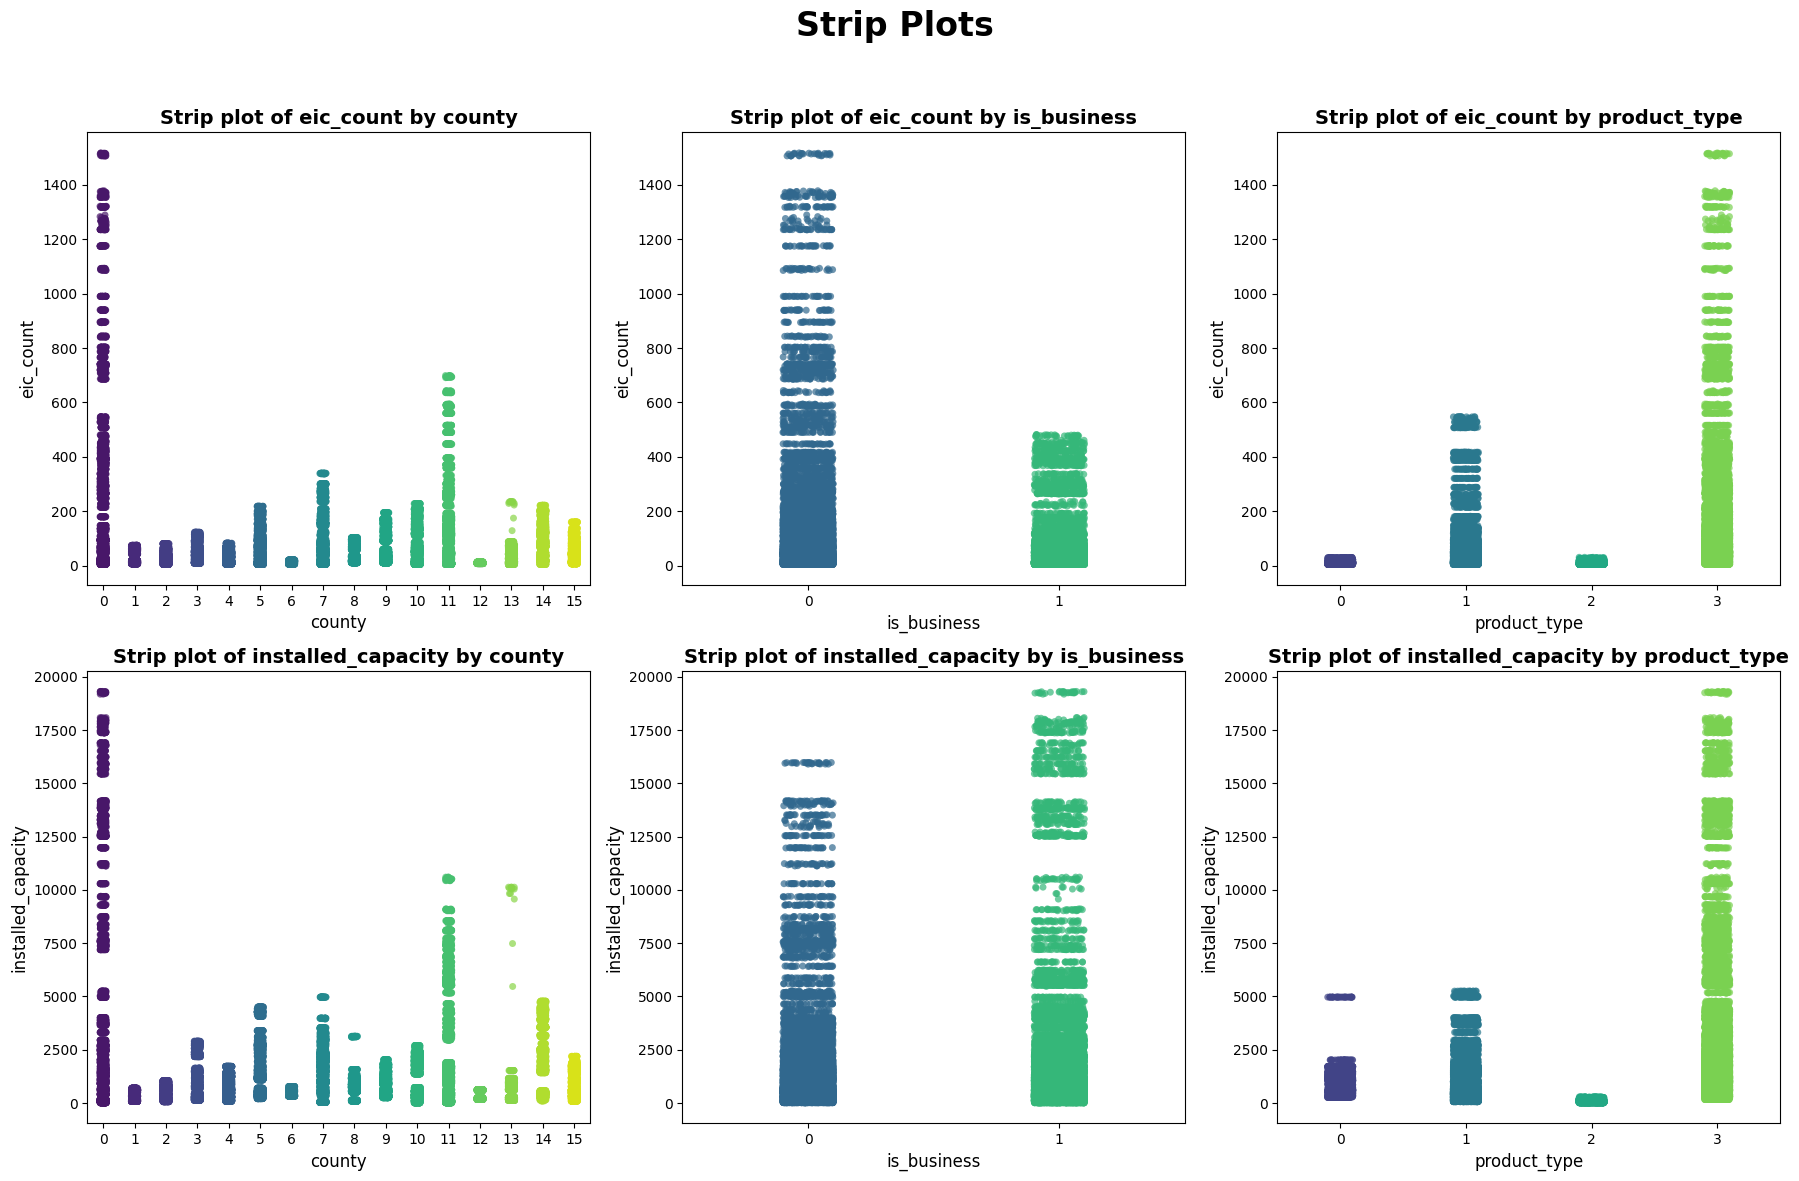

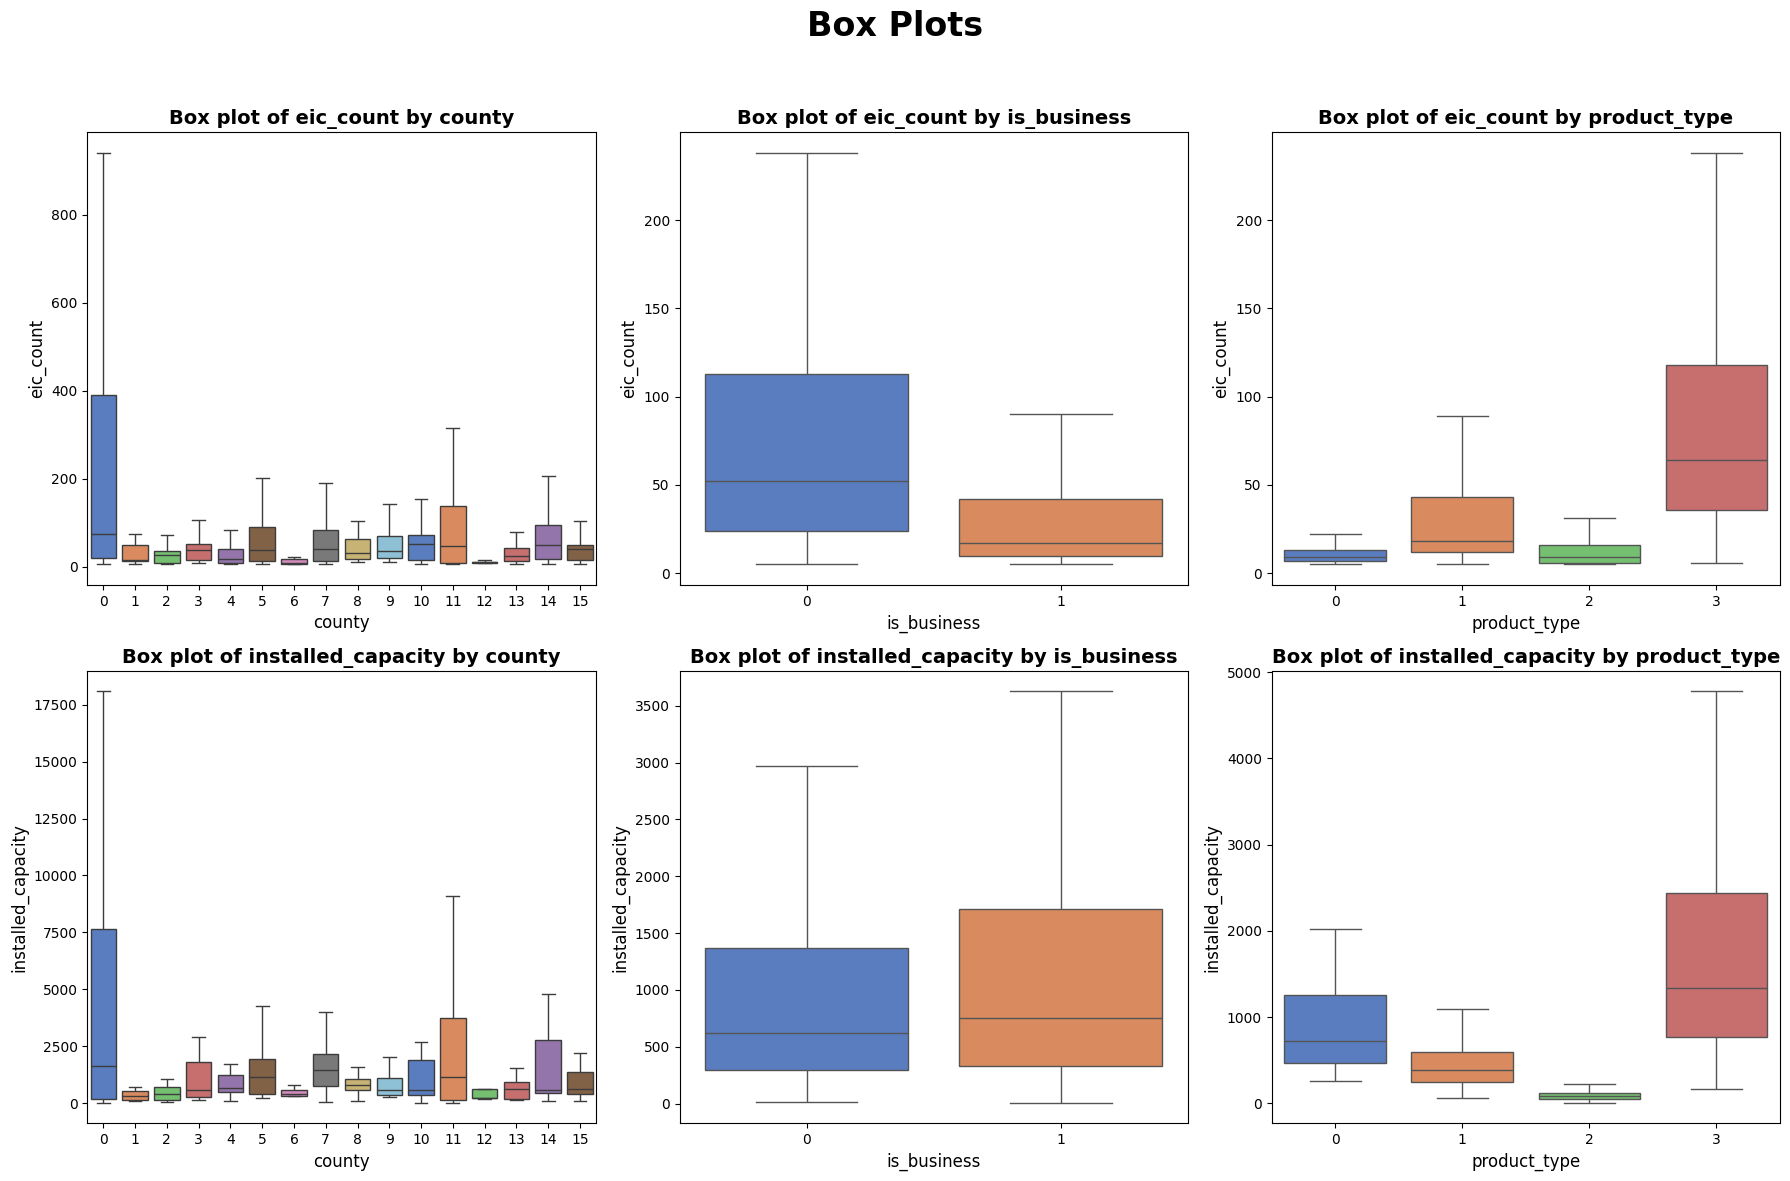

In [8]:
cat_columns = ['county', 'is_business', 'product_type']
num_columns = ['eic_count', 'installed_capacity']
import EDA
eda = EDA.Exploratory_analysis(data_storage.df_client, cat_columns, num_columns)
eda.plot_stripplots()
eda.plot_boxplots()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

mask = ((client_df['eic_count'] <= 200) & (client_df['installed_capacity'] <= 5000))

client400 = client_df[mask]

sns.histplot(client400,ax=ax1, x="installed_capacity", y='eic_count', hue='is_business')
sns.histplot(client400,ax=ax2, x="installed_capacity", y='eic_count', hue='county')
sns.histplot(client400,ax=ax3, x="installed_capacity", y='eic_count', hue='product_type')


<Axes: xlabel='installed_capacity', ylabel='eic_count'>

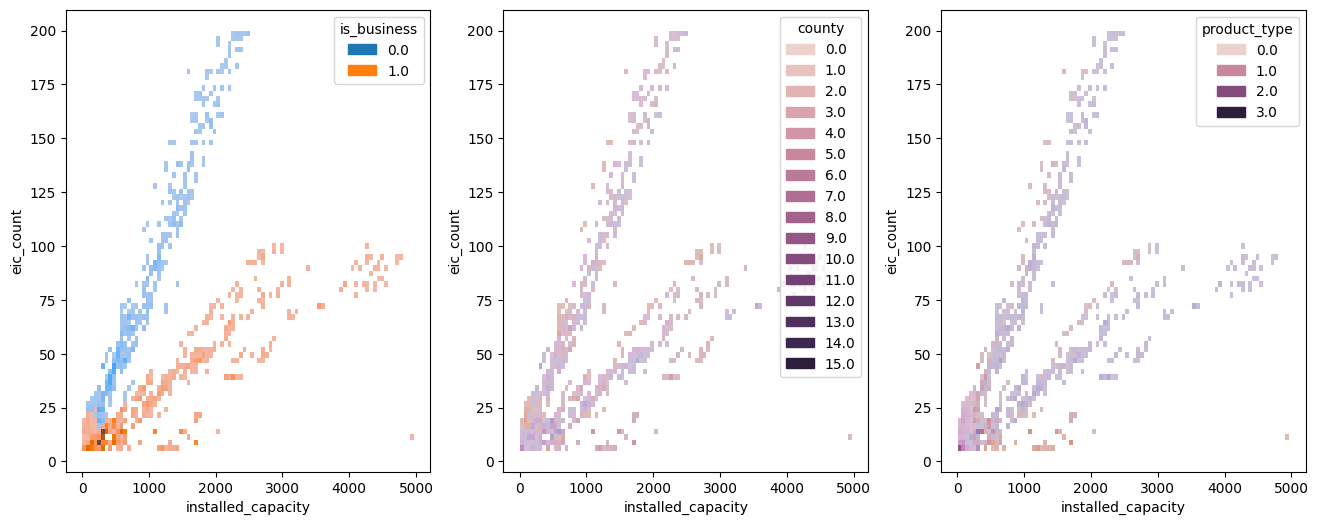

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

mask = ((client_df['eic_count'] <= 200) & (client_df['installed_capacity'] <= 5000))

client400 = client_df[mask]

sns.histplot(client400,ax=ax1, x="installed_capacity", y='eic_count', hue='is_business')
sns.histplot(client400,ax=ax2, x="installed_capacity", y='eic_count', hue='county')
sns.histplot(client400,ax=ax3, x="installed_capacity", y='eic_count', hue='product_type')

# Prosumers Segmentation

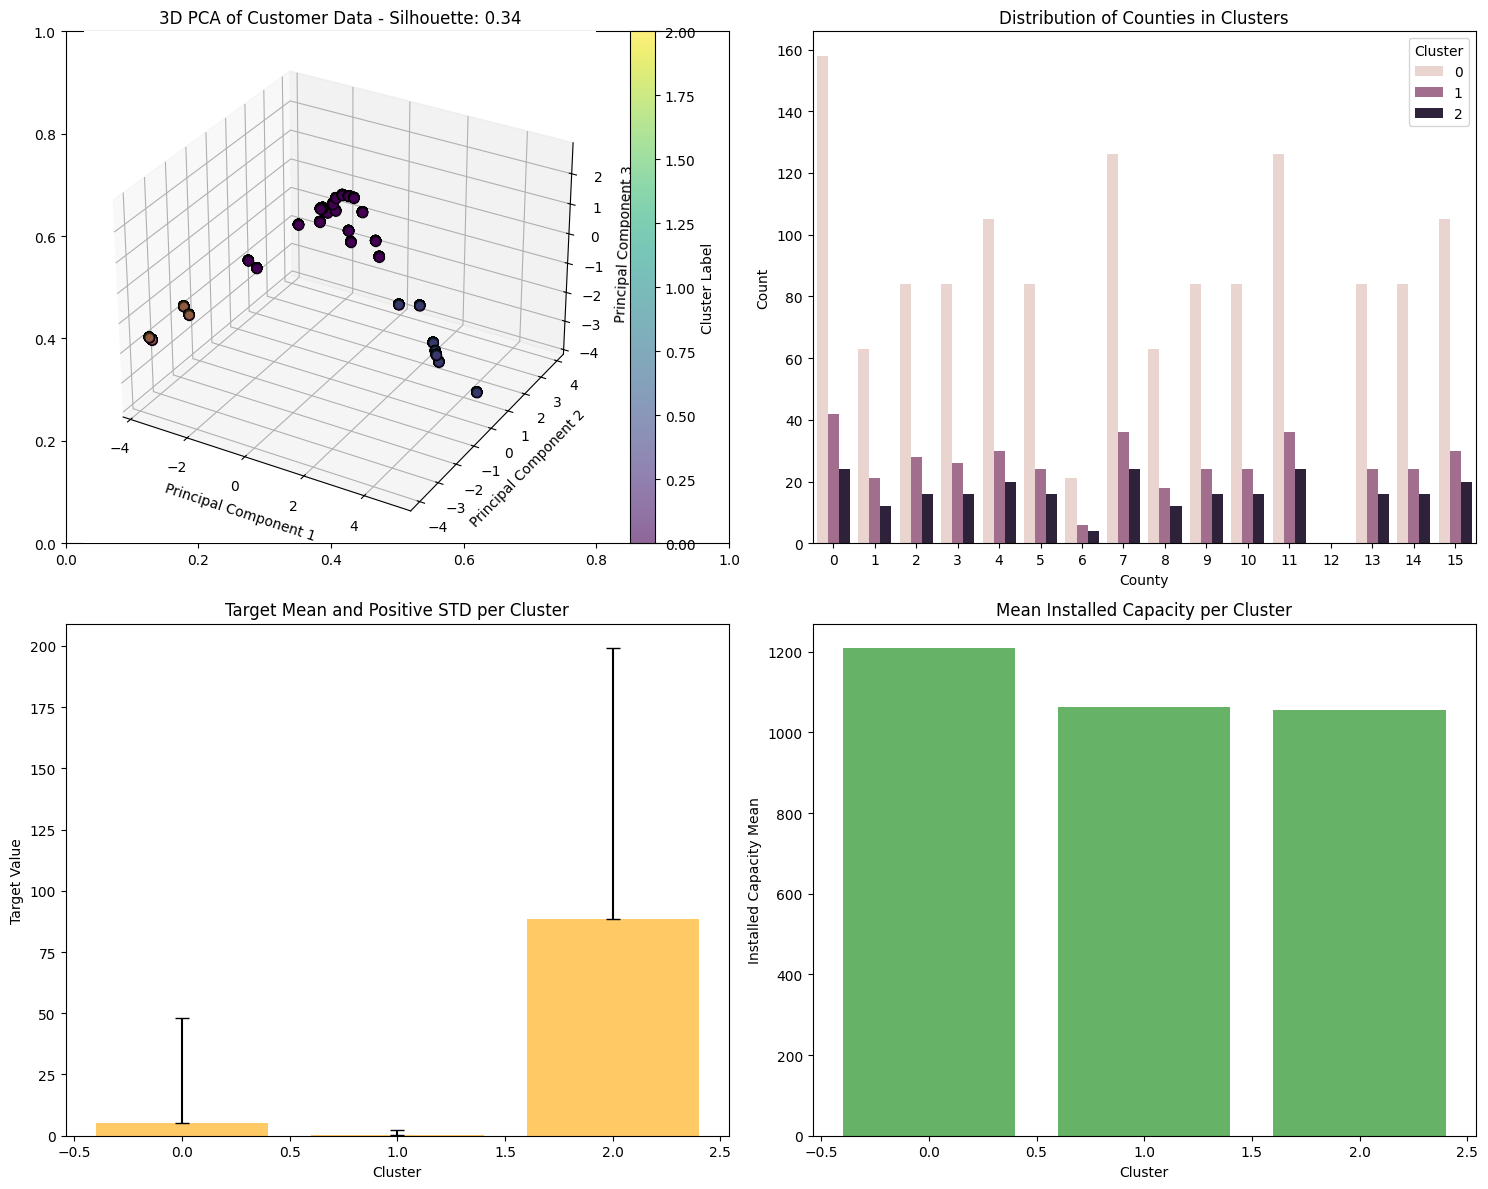

In [117]:
from Costumer_segment import SegmentationViz , CustomerSegmentation

columns_seg = [
    "target",
    "county",
    "is_business",
    "product_type",
    "is_consumption",
    "eic_count",
    "installed_capacity",
    "10_metre_u_wind_component",
    "10_metre_v_wind_component",
    "direct_solar_radiation",
    "surface_solar_radiation_downwards",
    "snowfall",
    "total_precipitation",
    "rain",
    "surface_pressure",
    "windspeed_10m",
    "winddirection_10m",
    "shortwave_radiation",
    "diffuse_radiation",
    "cloudcover_high",
    "cloudcover_low",
    "cloudcover_mid",
]
df_train_features_fil = df_train_features[columns_seg]

df_train_features_fil = df_train_features[columns_seg]

prosumers_df = df_train_features_fil[df_train_features_fil["is_consumption"]==0]
target_column = 'target'
customer_segmentation = SegmentationViz(prosumers_df.iloc[:2000], target_column, n_clusters=3)
customer_segmentation.run_analysis()


Training Classifiers:   0%|          | 0/4 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27475
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 147
[LightGBM] [Info] Start training from score -0.890989
[LightGBM] [Info] Start training from score -0.877070
[LightGBM] [Info] Start training from score -1.750138
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

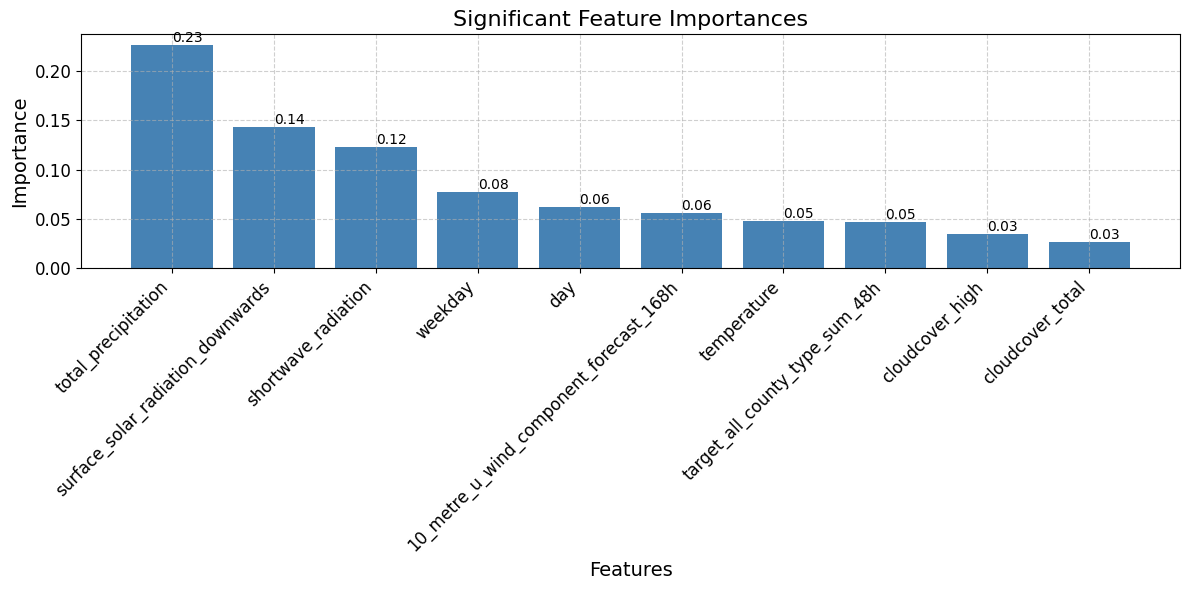

In [115]:
# Example usage:
customer_segment = CustomerSegmentation(prosumers_df.iloc[:10000], 'target', 3)
customer_segment.run_pipeline('hierarchical')
prosumers_df = customer_segment.create_customer_types_for_data(prosumers_df)

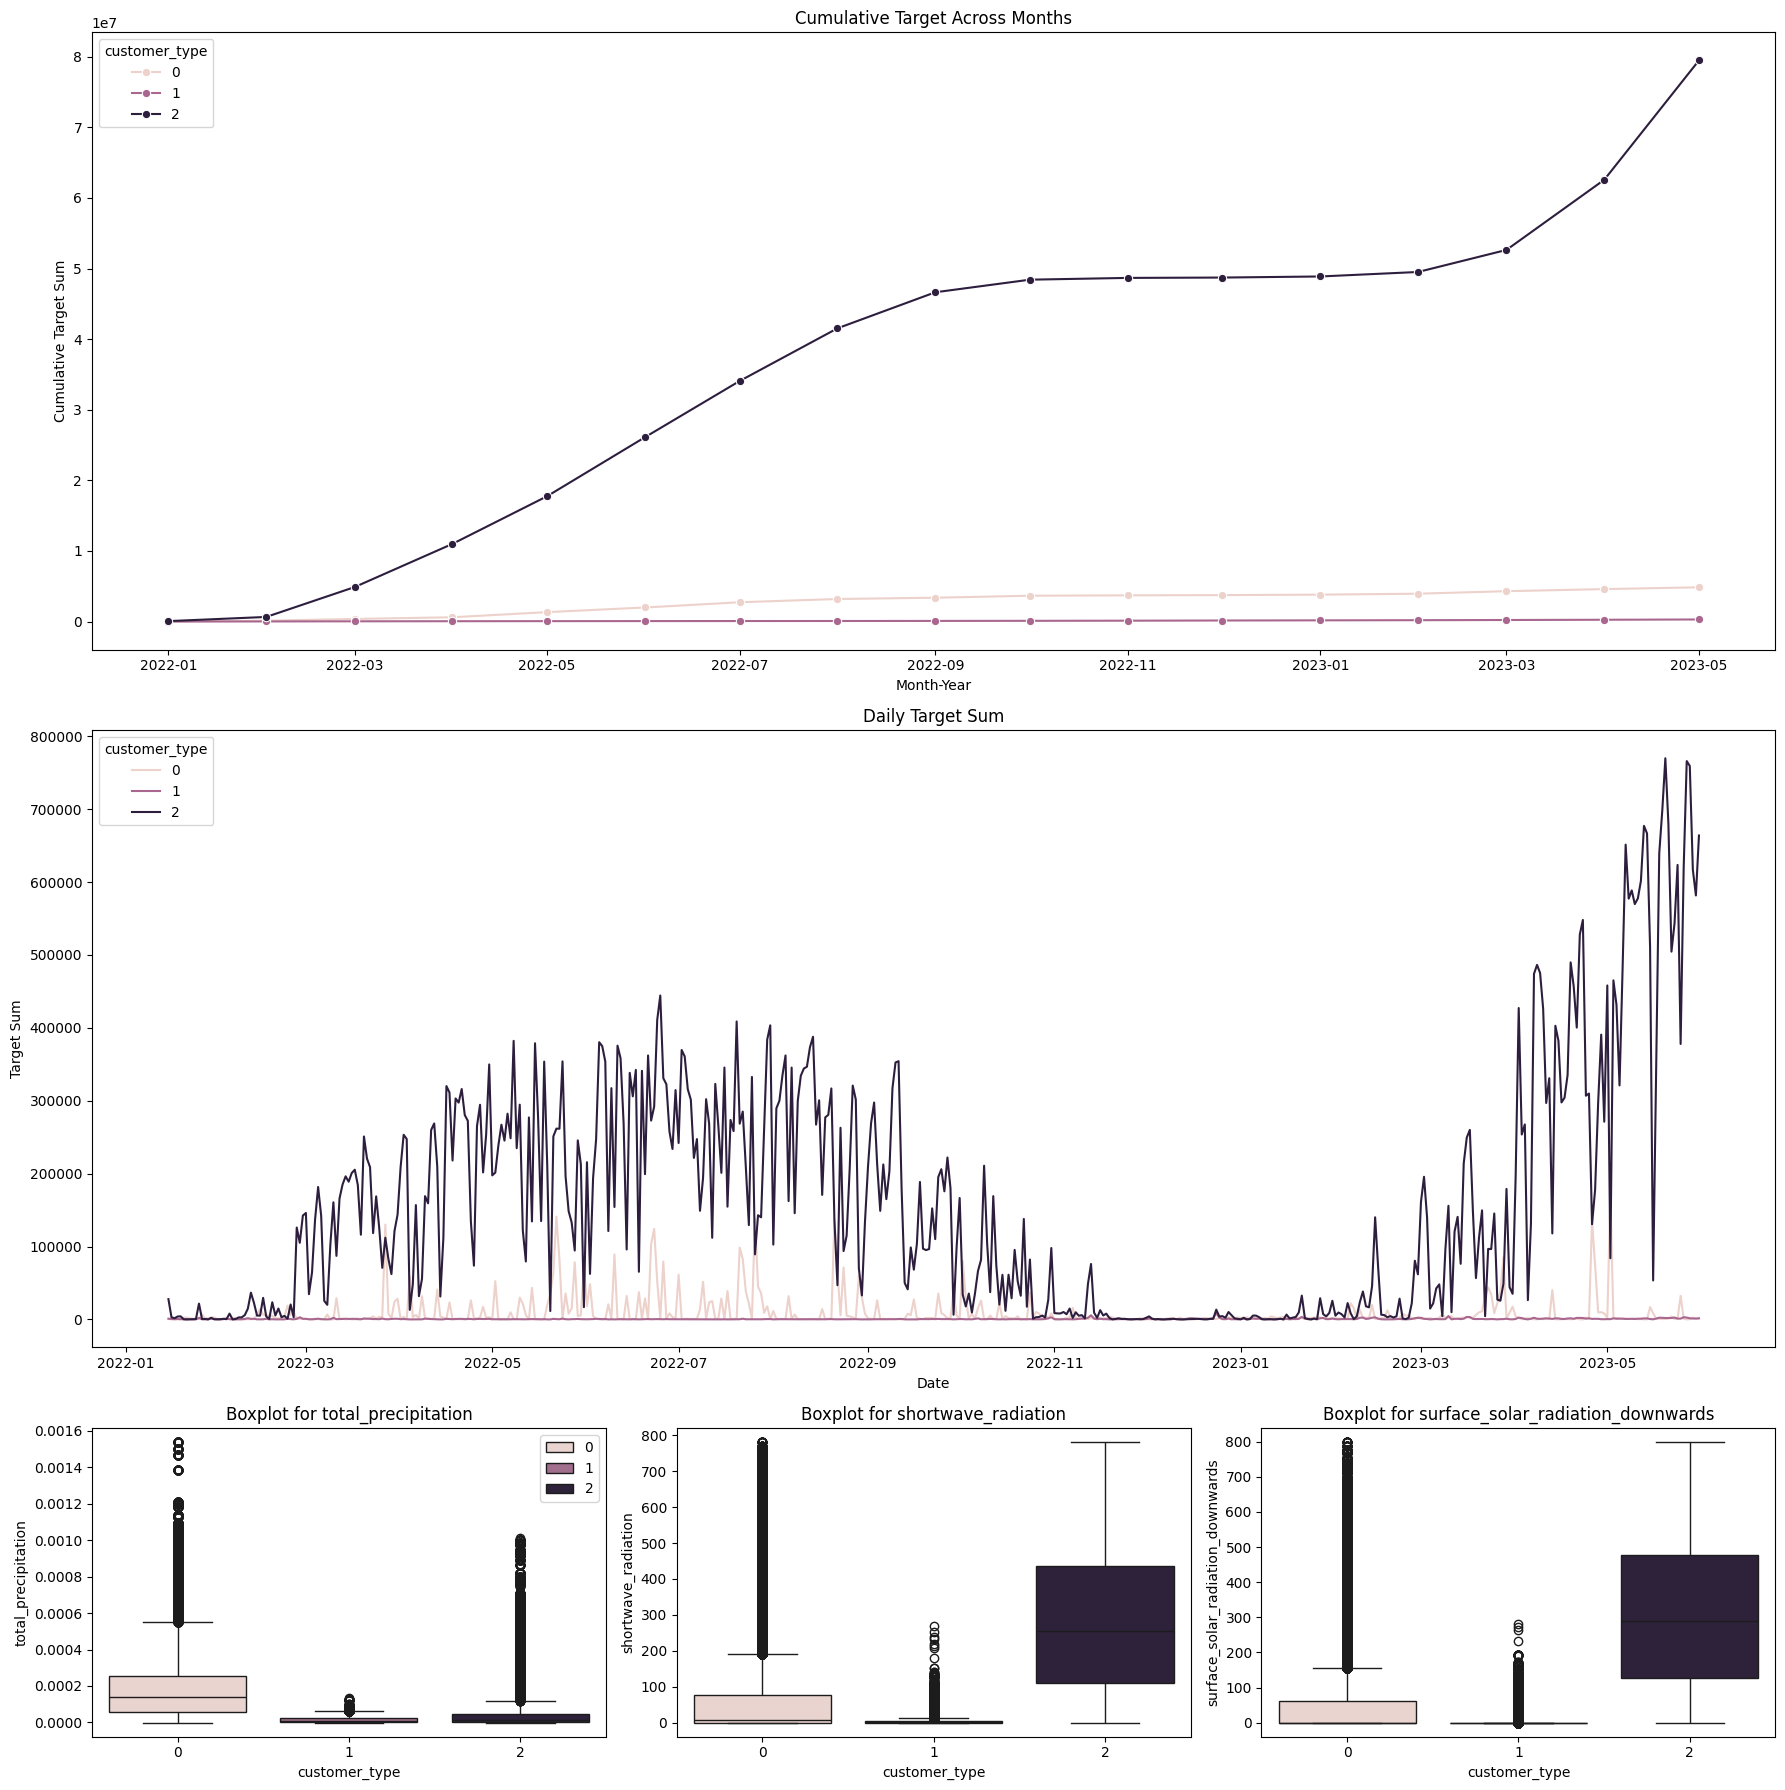

In [7]:
analytics = Analytics(prosumers_df)
cumulative_data_prosumers = analytics.plot_cumulative_target_across_months()
grouped_data_daily_prosumers = analytics.summarize_target_by_time_unit('daily')
boxplot_columns = ["total_precipitation", "shortwave_radiation", "surface_solar_radiation_downwards"]
analytics.plot_all_in_one_figure(cumulative_data_prosumers, grouped_data_daily_prosumers, boxplot_columns)


# Costumer Segmentation

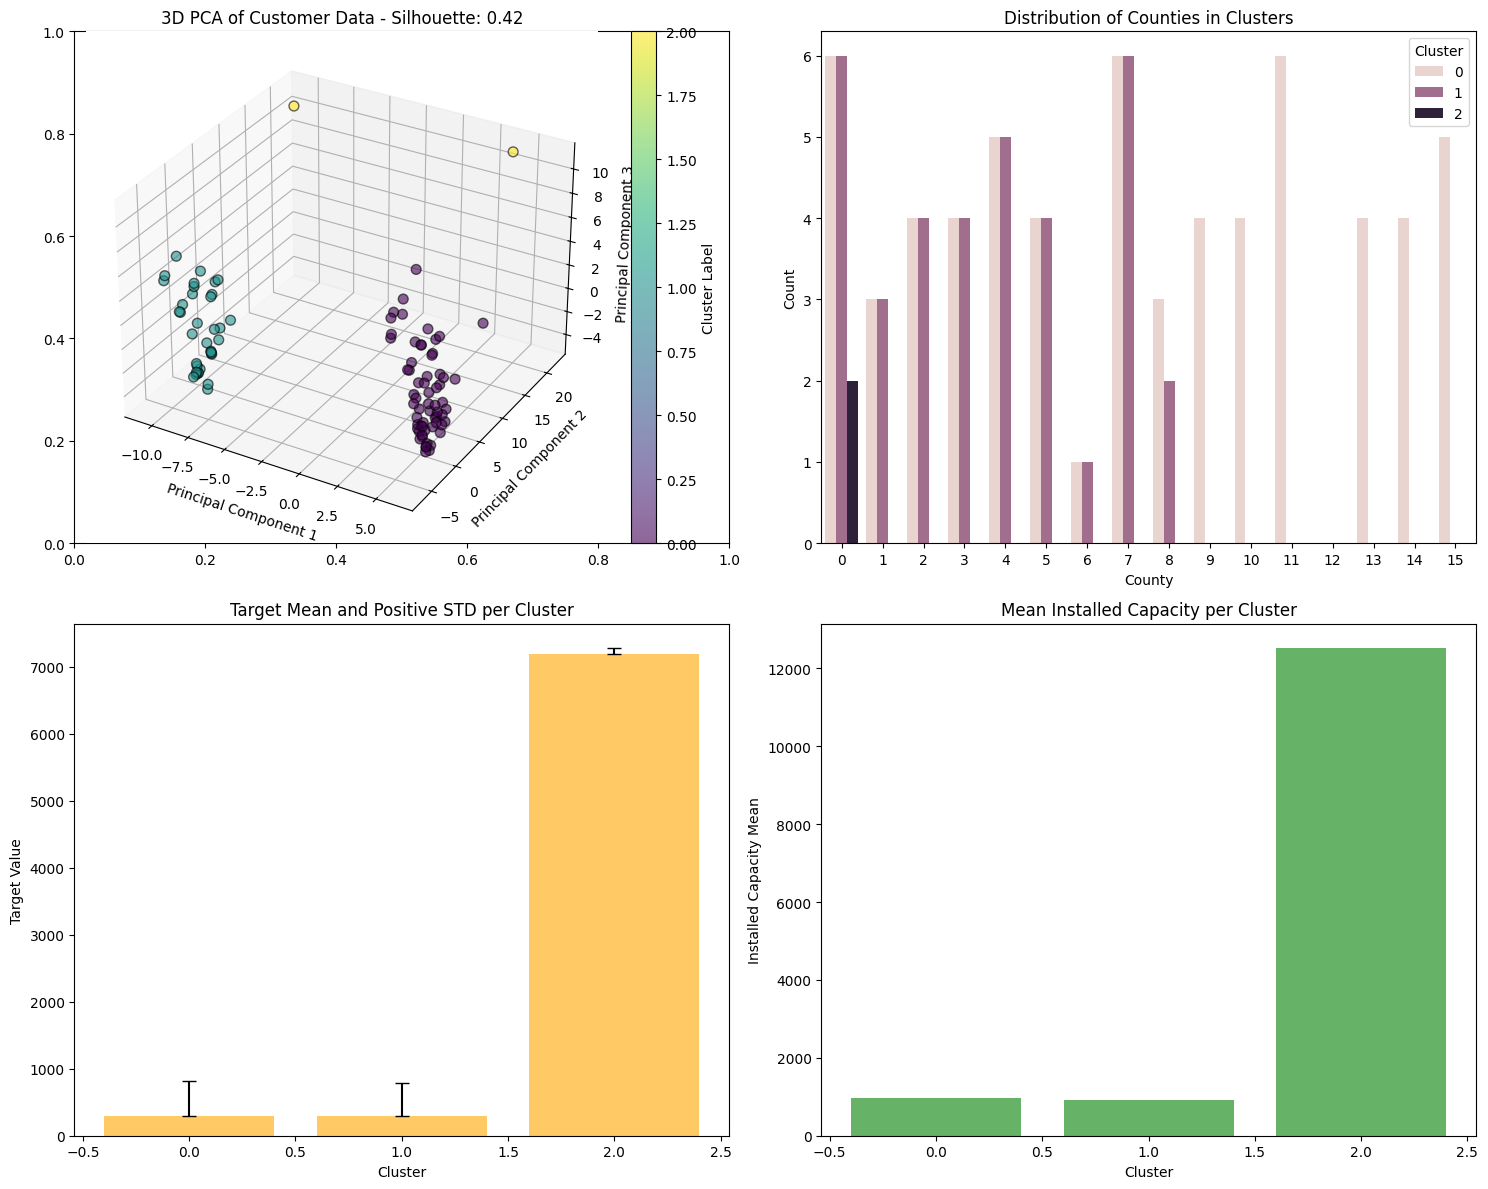

In [8]:
from Costumer_segment import SegmentationViz , CustomerSegmentation
consumers_df = df_train_features[df_train_features["is_consumption"]==1]
target_column = 'target'
customer_segmentation = SegmentationViz(consumers_df.iloc[:100], target_column, n_clusters=3)
customer_segmentation.run_analysis()

Training Classifiers:   0%|          | 0/4 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27466
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 147
[LightGBM] [Info] Start training from score -0.481469
[LightGBM] [Info] Start training from score -1.794263
[LightGBM] [Info] Start training from score -1.533056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

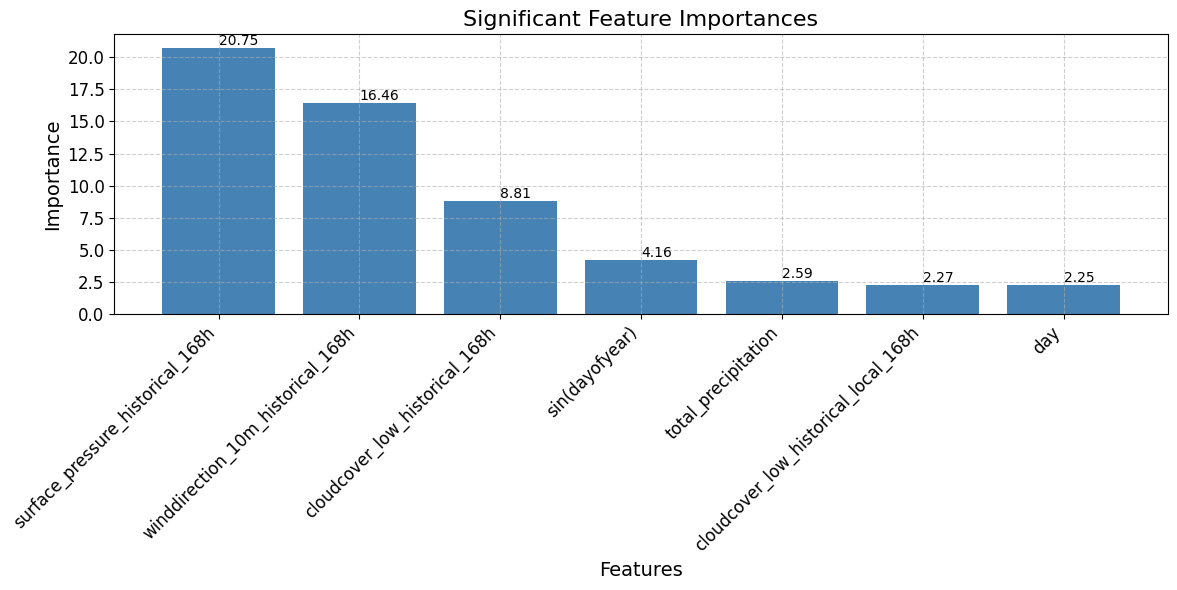

In [9]:
# Example usage:
customer_segment = CustomerSegmentation(consumers_df.iloc[:10000], 'target', 3)
customer_segment.run_pipeline('hierarchical')
prosumers_df = customer_segment.create_customer_types_for_data(consumers_df)

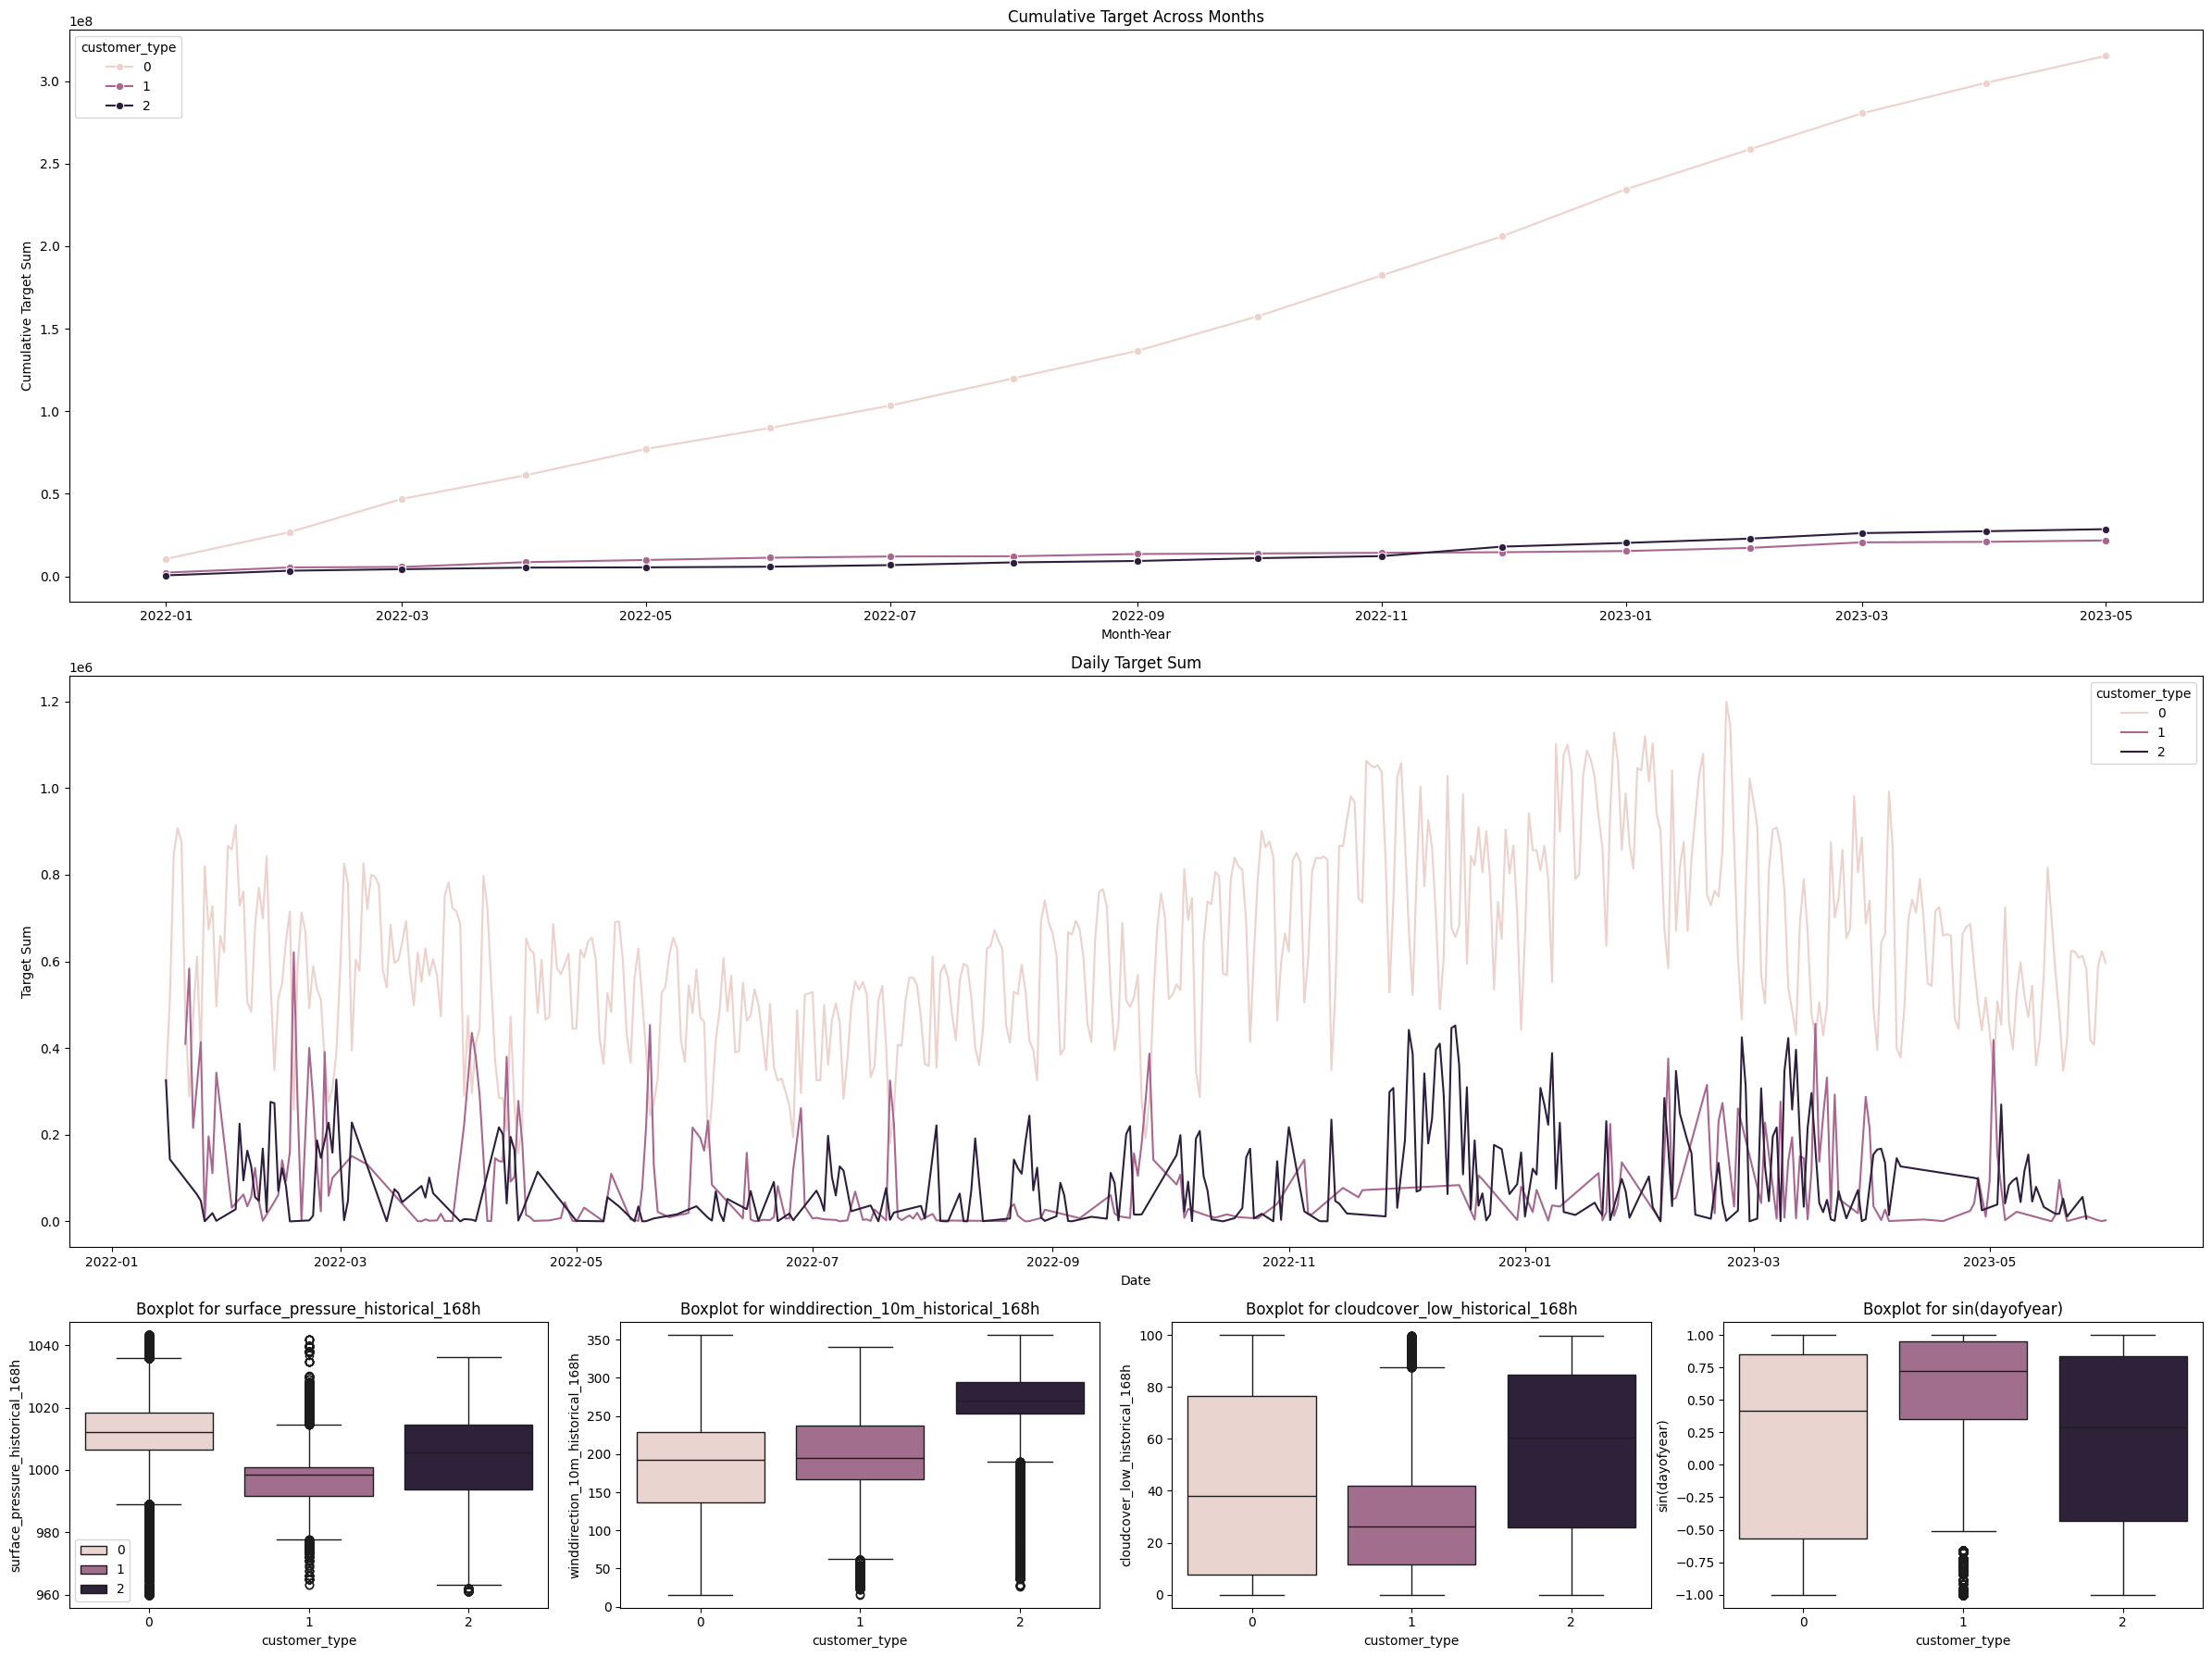

In [11]:
# Assuming you have some data loaded in `prosumers_df`
analytics = Analytics(consumers_df)
cumulative_data_consumers = analytics.plot_cumulative_target_across_months()
grouped_data_daily_consumers = analytics.summarize_target_by_time_unit('daily')
boxplot_columns = ["surface_pressure_historical_168h", "winddirection_10m_historical_168h", "cloudcover_low_historical_168h", "sin(dayofyear)"]
analytics.plot_all_in_one_figure(cumulative_data_consumers, grouped_data_daily_consumers, boxplot_columns)


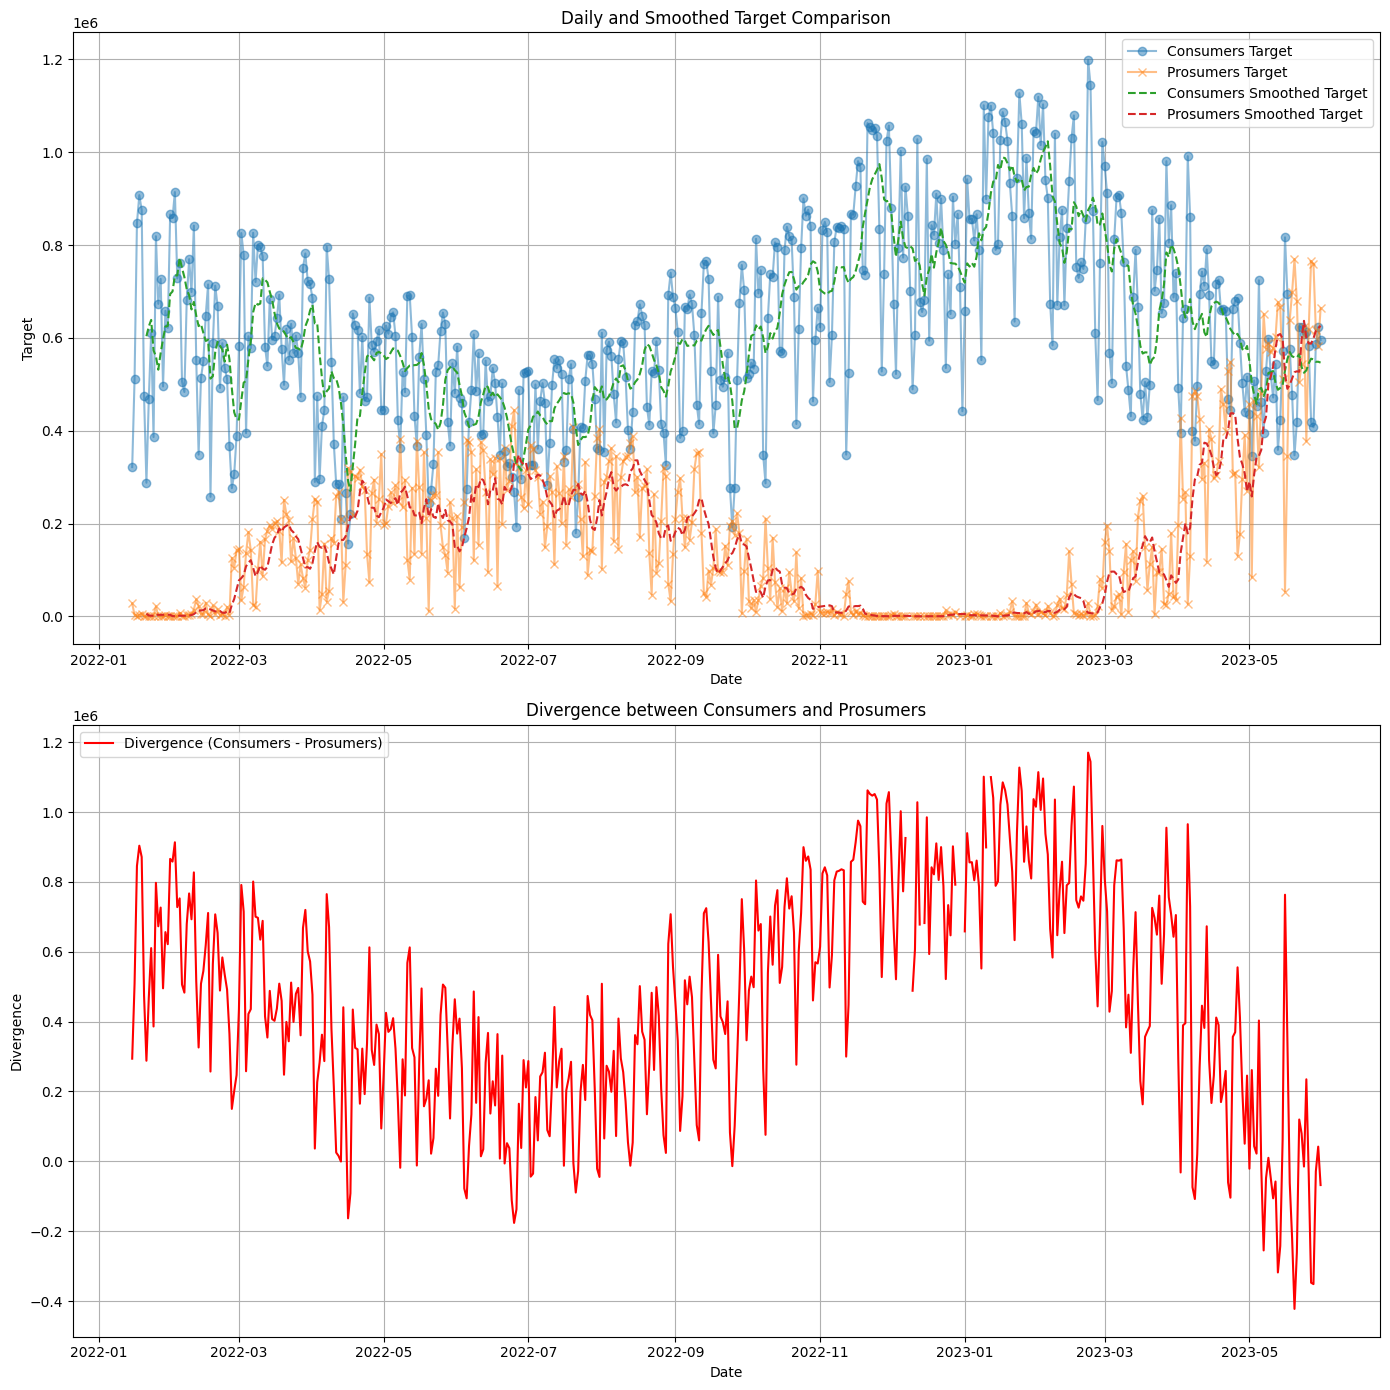

In [14]:
EDA.plot_consumer_prosumer_data(grouped_data_daily_consumers, grouped_data_daily_prosumers, 0, 2)